In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Read in the data

In [2]:
path = 'ML/Payment/'

file_2020q1_OH=pd.read_csv(path+'file_2020Q1_OH.csv')
file_2020q1_VA=pd.read_csv(path+'file_2020Q1_VA.csv')
file_2020q1_GA=pd.read_csv(path+'file_2020Q1_GA.csv')
file_2020q1_MI=pd.read_csv(path+'file_2020Q1_MI.csv')
file_2020q1_CO=pd.read_csv(path+'file_2020Q1_CO.csv')

In [3]:
df=pd.concat([file_2020q1_OH, file_2020q1_VA, file_2020q1_GA, file_2020q1_MI, file_2020q1_CO])
df.shape

(2071611, 108)

In [4]:
df['LOAN_ID'].nunique()

104924

In [5]:
df.groupby('STATE')['LOAN_ID'].count()

STATE
CO    485045
GA    428255
MI    479014
OH    339552
VA    339745
Name: LOAN_ID, dtype: int64

## Part 2: Define 'bad'
* We intend to apply a more stringent criterion for defining 'bad'.
* This definition bad will be used to build a payment default model.
* Two things to consider for defining such a variable as 'bad'?
** The definition should be representative of bad/derogatory behavior
** We can get enough such data points for modeling

In [6]:
df.columns.tolist()

['POOL_ID',
 'LOAN_ID',
 'ACT_PERIOD',
 'CHANNEL',
 'SELLER',
 'SERVICER',
 'MASTER_SERVICER',
 'ORIG_RATE',
 'CURR_RATE',
 'ORIG_UPB',
 'ISSUANCE_UPB',
 'CURRENT_UPB',
 'ORIG_TERM',
 'ORIG_DATE',
 'FIRST_PAY',
 'LOAN_AGE',
 'REM_MONTHS',
 'ADJ_REM_MONTHS',
 'MATR_DT',
 'OLTV',
 'OCLTV',
 'NUM_BO',
 'DTI',
 'CSCORE_B',
 'CSCORE_C',
 'FIRST_FLAG',
 'PURPOSE',
 'PROP',
 'NO_UNITS',
 'OCC_STAT',
 'STATE',
 'MSA',
 'ZIP',
 'MI_PCT',
 'PRODUCT',
 'PPMT_FLG',
 'IO',
 'FIRST_PAY_IO',
 'MNTHS_TO_AMTZ_IO',
 'DLQ_STATUS',
 'PMT_HISTORY',
 'MOD_FLAG',
 'MI_CANCEL_FLAG',
 'Zero_Bal_Code',
 'ZB_DTE',
 'LAST_UPB',
 'RPRCH_DTE',
 'CURR_SCHD_PRNCPL',
 'TOT_SCHD_PRNCPL',
 'UNSCHD_PRNCPL_CURR',
 'LAST_PAID_INSTALLMENT_DATE',
 'FORECLOSURE_DATE',
 'DISPOSITION_DATE',
 'FORECLOSURE_COSTS',
 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS',
 'ASSET_RECOVERY_COSTS',
 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS',
 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
 'NET_SALES_PROCEEDS',
 'CREDIT_ENHANCEMENT_PROCEEDS',
 'REPUR

In [7]:
df.groupby('DLQ_STATUS')['LOAN_ID'].count()

DLQ_STATUS
0     2019379
1       14783
2        7204
3        5353
4        3983
5        3351
6        2724
7        2209
8        1934
9        1704
10       1510
11       1368
12       1146
13        963
14        856
15        746
16        617
17        557
18        409
19        296
20        250
21        145
22         70
23         40
24         14
Name: LOAN_ID, dtype: int64

In [8]:
df['bad']=np.where(df['DLQ_STATUS'] >= 6, 1, 0)
df_bad=df.groupby('LOAN_ID')['bad'].sum().reset_index()
df_bad['bad']=np.where(df_bad['bad'] > 0, 1, 0)

In [9]:
print(df_bad['bad'].mean())
print(df_bad['bad'].sum())

0.02353131790629408
2469


In [10]:
df_bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104924 entries, 0 to 104923
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   LOAN_ID  104924 non-null  int64
 1   bad      104924 non-null  int64
dtypes: int64(2)
memory usage: 1.6 MB


In [11]:
df_nodup=df.drop_duplicates(subset='LOAN_ID', keep='first').reset_index()

In [12]:
df_nodup.columns.tolist()

['index',
 'POOL_ID',
 'LOAN_ID',
 'ACT_PERIOD',
 'CHANNEL',
 'SELLER',
 'SERVICER',
 'MASTER_SERVICER',
 'ORIG_RATE',
 'CURR_RATE',
 'ORIG_UPB',
 'ISSUANCE_UPB',
 'CURRENT_UPB',
 'ORIG_TERM',
 'ORIG_DATE',
 'FIRST_PAY',
 'LOAN_AGE',
 'REM_MONTHS',
 'ADJ_REM_MONTHS',
 'MATR_DT',
 'OLTV',
 'OCLTV',
 'NUM_BO',
 'DTI',
 'CSCORE_B',
 'CSCORE_C',
 'FIRST_FLAG',
 'PURPOSE',
 'PROP',
 'NO_UNITS',
 'OCC_STAT',
 'STATE',
 'MSA',
 'ZIP',
 'MI_PCT',
 'PRODUCT',
 'PPMT_FLG',
 'IO',
 'FIRST_PAY_IO',
 'MNTHS_TO_AMTZ_IO',
 'DLQ_STATUS',
 'PMT_HISTORY',
 'MOD_FLAG',
 'MI_CANCEL_FLAG',
 'Zero_Bal_Code',
 'ZB_DTE',
 'LAST_UPB',
 'RPRCH_DTE',
 'CURR_SCHD_PRNCPL',
 'TOT_SCHD_PRNCPL',
 'UNSCHD_PRNCPL_CURR',
 'LAST_PAID_INSTALLMENT_DATE',
 'FORECLOSURE_DATE',
 'DISPOSITION_DATE',
 'FORECLOSURE_COSTS',
 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS',
 'ASSET_RECOVERY_COSTS',
 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS',
 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
 'NET_SALES_PROCEEDS',
 'CREDIT_ENHANCEMENT_PROCEEDS

#### merge the data 

In [13]:
df_nodup=pd.merge(df_nodup.drop('bad', axis=1), df_bad, on='LOAN_ID', how='inner')

In [14]:
df_nodup['bad'].mean()

0.02353131790629408

## Part 3: Select variables for modeling
* Since this is an underwriting model, we will only select those variables available at the time of origination. 
* These varibles do not change their values throughout the life of a loan. 

In [15]:
def dummyvar(x):
    x['purpose_rate_refi']=np.where(x['PURPOSE'].str.strip()=='R', 1, 0)
    x['purpose_cashout_refi']=np.where(x['PURPOSE'].str.strip()=='C', 1, 0)
    x['property_pud']=np.where(x['PROP'].str.strip()=='PU', 1, 0)
    x['property_condo']=np.where(x['PROP'].str.strip()=='CO', 1, 0)
    x['property_other']=np.where(x['PROP'].str.strip().isin(['CP', 'MH']), 1, 0)
    x['term_30years']=np.where(x['ORIG_TERM']==360, 1, 0)
    x['term_15years']=np.where(x['ORIG_TERM']==180, 1, 0)
    x['mi']=np.where(x['MI_PCT'] > 0, 1, 0)
    
dummyvar(df_nodup)

In [16]:
columns_to_keep=['CSCORE_B', 'DTI', 'OLTV', 'ORIG_UPB', 'bad', 'LOAN_ID']

df_nodup[columns_to_keep].describe().T

,count,mean,std,min,25%,50%,75%,max
CSCORE_B,104873.0,7.567624e+02,42.412137,620.0,729.00,766.0,791.00,835.0
DTI,104922.0,3.415779e+01,9.579630,1.0,27.00,35.0,42.00,50.0
OLTV,104924.0,7.392929e+01,16.254267,7.0,65.00,76.0,85.00,97.0
ORIG_UPB,104924.0,2.537213e+05,123826.341576,10000.0,156000.00,237000.0,335000.00,800000.0
bad,104924.0,2.353132e-02,0.151584,0.0,0.00,0.0,0.00,1.0
LOAN_ID,104924.0,9.917922e+07,197019.945107,98836742.0,99009455.75,99180553.5,99349026.75,99520476.0


In [17]:
# remove loans with no credit score or DTI
df_sample=df_nodup[(df_nodup['CSCORE_B'] > 0) & (df_nodup['DTI'] > 0)][columns_to_keep]
df_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
CSCORE_B,104871.0,7.567624e+02,42.412282,620.0,729.0,766.0,791.0,835.0
DTI,104871.0,3.416106e+01,9.578838,1.0,27.0,35.0,42.0,50.0
OLTV,104871.0,7.392818e+01,16.254008,7.0,65.0,76.0,85.0,97.0
ORIG_UPB,104871.0,2.537530e+05,123823.523399,10000.0,156000.0,237000.0,335000.0,800000.0
bad,104871.0,2.354321e-02,0.151622,0.0,0.0,0.0,0.0,1.0
LOAN_ID,104871.0,9.917920e+07,197011.330265,98836742.0,99009454.5,99180544.0,99349004.0,99520476.0


## Part 4: Logistic Regression Model

* Split the sample into a modeling sample and a validation sample

In [18]:
# By defining the random seed first, we will have the same split for modeling sample and validation sample when you rerun 
# the program. By doing so, we will have the same regression results everyone when we rerun the entire program.
# You can assign any number to seed. 
np.random.seed(seed=3)
df_sample['random']=np.random.uniform(0, 1, len(df_sample['CSCORE_B']))

In [19]:
# make a copy of original variables
df_sample['CSCORE_B_raw']=df_sample['CSCORE_B']
df_sample['DTI_raw']=df_sample['DTI']
df_sample['OLTV_raw']=df_sample['OLTV']
df_sample['ORIG_UPB_raw']=df_sample['ORIG_UPB']

df_sample.head()

,CSCORE_B,DTI,OLTV,ORIG_UPB,bad,LOAN_ID,random,CSCORE_B_raw,DTI_raw,OLTV_raw,ORIG_UPB_raw
0,806.0,25.0,66,207000.0,0,98836743,0.550798,806.0,25.0,66,207000.0
1,745.0,42.0,73,215000.0,0,98836744,0.708148,745.0,42.0,73,215000.0
2,755.0,31.0,63,210000.0,1,98836805,0.290905,755.0,31.0,63,210000.0
3,739.0,36.0,97,200000.0,0,98836862,0.510828,739.0,36.0,97,200000.0
4,665.0,40.0,95,109000.0,0,98836951,0.892947,665.0,40.0,95,109000.0


In [20]:
df_sample['seg']=np.where(df_sample['random'] <= 0.6, 'mod', 'val')

df_mod=df_sample[df_sample['seg']=='mod']
df_val=df_sample[df_sample['seg']=='val']

print("Average bad rate for the modeling sample:", df_mod['bad'].mean())
print("Average bad rate for the validation sample:", df_val['bad'].mean())

Average bad rate for the modeling sample: 0.02409235135609165
Average bad rate for the validation sample: 0.022726194429947336


In [21]:
import statsmodels.formula.api as smf

model=smf.logit('bad ~ CSCORE_B + DTI + OLTV + ORIG_UPB', data=df_mod).fit()

#view model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.104718
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                62717
Model:                          Logit   Df Residuals:                    62712
Method:                           MLE   Df Model:                            4
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                 0.07790
Time:                        21:17:29   Log-Likelihood:                -6567.6
converged:                       True   LL-Null:                       -7122.4
Covariance Type:            nonrobust   LLR p-value:                6.095e-239
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2938      0.477      4.813      0.000       1.360       3.228
CSCORE_B      -0.0134      0.

* Most regression will generate the above summary, which is good enough to be validated and to put to use.
* We can use z score as an indicator for a variable's predictive value. 
* We cannot use the magnitude of coefficient estimator as the its predictive value. 
* There is a straightforward way to use coefficient estimator as an indicator for a variable's predictive power. 

In [22]:
# normalize all input variables so that they are all in the range [0, 1]
def normalize(x, sample):
    x_min=df_mod[x].min()
    x_max=df_mod[x].max()
    x_norm=(sample[x]-x_min)/(x_max-x_min)
    return x_norm

# normalization criteria (min, max, std) should be based on the modeling sample
df_mod['CSCORE_B']=normalize('CSCORE_B_raw', df_mod)
df_mod['DTI']=normalize('DTI_raw', df_mod)
df_mod['OLTV']=normalize('OLTV_raw', df_mod)
df_mod['ORIG_UPB']=normalize('ORIG_UPB_raw', df_mod)

# apply the same criteria on the validation sample.
# You cannot use the min and max based on the validation sample.
df_val['CSCORE_B']=normalize('CSCORE_B_raw', df_val)
df_val['DTI']=normalize('DTI_raw', df_val)
df_val['OLTV']=normalize('OLTV_raw', df_val)
df_val['ORIG_UPB']=normalize('ORIG_UPB_raw', df_val)

/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/1429221821.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['CSCORE_B']=normalize('CSCORE_B_raw', df_mod)
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/1429221821.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['DTI']=normalize('DTI_raw', df_mod)
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/1429221821.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [23]:
# check the transformation of all input variables
# check whether the sample has full coverge for all variables.  Missing values need to be imputed. 
# check whether max contains infinite values
df_mod.drop(['LOAN_ID', 'random'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
CSCORE_B,62717.0,0.636291,0.197110,0.0,0.506977,0.679070,0.795349,1.0
DTI,62717.0,0.669452,0.199548,0.0,0.520833,0.687500,0.833333,1.0
OLTV,62717.0,0.743163,0.180119,0.0,0.644444,0.766667,0.866667,1.0
ORIG_UPB,62717.0,0.308445,0.156683,0.0,0.186076,0.287342,0.411392,1.0
bad,62717.0,0.024092,0.153337,0.0,0.000000,0.000000,0.000000,1.0
CSCORE_B_raw,62717.0,756.802510,42.378652,620.0,729.000000,766.000000,791.000000,835.0
DTI_raw,62717.0,34.133712,9.578324,2.0,27.000000,35.000000,42.000000,50.0
OLTV_raw,62717.0,73.884641,16.210735,7.0,65.000000,76.000000,85.000000,97.0
ORIG_UPB_raw,62717.0,253671.683913,123779.259828,10000.0,157000.000000,237000.000000,335000.000000,800000.0


In [24]:
df_val.drop(['LOAN_ID', 'random'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
CSCORE_B,42154.0,0.635827,0.197501,0.000000,0.502326,0.679070,0.795349,0.986047
DTI,42154.0,0.670870,0.199574,-0.020833,0.520833,0.687500,0.833333,1.000000
OLTV,42154.0,0.744366,0.181313,0.011111,0.644444,0.766667,0.866667,1.000000
ORIG_UPB,42154.0,0.308701,0.156824,0.002532,0.184810,0.286076,0.412658,0.956962
bad,42154.0,0.022726,0.149031,0.000000,0.000000,0.000000,0.000000,1.000000
CSCORE_B_raw,42154.0,756.702828,42.462700,620.000000,728.000000,766.000000,791.000000,832.000000
DTI_raw,42154.0,34.201760,9.579572,1.000000,27.000000,35.000000,42.000000,50.000000
OLTV_raw,42154.0,73.992954,16.318154,8.000000,65.000000,76.000000,85.000000,97.000000
ORIG_UPB_raw,42154.0,253873.985861,123890.719446,12000.000000,156000.000000,236000.000000,336000.000000,766000.000000


* logistic regression

In [25]:
import statsmodels.formula.api as smf

model=smf.logit('bad ~ CSCORE_B + DTI + OLTV + ORIG_UPB', data=df_mod).fit()

#view model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.104718
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                62717
Model:                          Logit   Df Residuals:                    62712
Method:                           MLE   Df Model:                            4
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                 0.07790
Time:                        21:17:30   Log-Likelihood:                -6567.6
converged:                       True   LL-Null:                       -7122.4
Covariance Type:            nonrobust   LLR p-value:                6.095e-239
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7430      0.199    -28.862      0.000      -6.133      -5.353
CSCORE_B      -2.8829      0.

## Part 5: Model evaluation

In [26]:
def logit(x):
    x['risk_score']=-5.7430+-2.8829*x['CSCORE_B']+2.2651*x['DTI']+2.1547*x['OLTV']+1.1593*x['ORIG_UPB']
    x['risk_score']=1/(1+np.exp(-1*x['risk_score']))
    
logit(df_mod)
logit(df_val)

/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/845291204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['risk_score']=-5.7430+-2.8829*x['CSCORE_B']+2.2651*x['DTI']+2.1547*x['OLTV']+1.1593*x['ORIG_UPB']
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/845291204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['risk_score']=1/(1+np.exp(-1*x['risk_score']))
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/845291204.py:2: SettingWithCopyWarning: 
A v

In [27]:
# divide the score into 10 evenly distributed bins
df_mod['risk_score_cut']=pd.qcut(df_mod['risk_score'], q=10, retbins=False, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/2489137501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['risk_score_cut']=pd.qcut(df_mod['risk_score'], q=10, retbins=False, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [28]:
df_mod.groupby('risk_score_cut')[['risk_score', 'bad']].mean()

,risk_score,bad
risk_score_cut,,
0,0.003090,0.004464
1,0.005911,0.006059
2,0.008531,0.008771
3,0.011432,0.011798
4,0.014856,0.010842
5,0.019064,0.016744
6,0.024526,0.025829
7,0.032282,0.035082
8,0.044643,0.045918


In [29]:
#df_mod['risk_score_cut']=pd.qcut(df_mod['risk_score'], q=10, retbins=False)

#df_mod.groupby('risk_score_cut')[['risk_score', 'bad']].mean()

In [30]:
# obtain the thresholds for dividing score into 10 bins
# The same thresholds should be applied to both modeling sample and validation sample
# Strictly speaking, you cannot create another score bins based on the validation sample and then apply to the validation sample.
score_threshold=df_mod.groupby('risk_score_cut')['risk_score'].min().reset_index()
score_threshold

,risk_score_cut,risk_score
0,0,0.000394
1,1,0.004626
2,2,0.007218
3,3,0.009915
4,4,0.013043
5,5,0.016820
6,6,0.021546
7,7,0.027863
8,8,0.037333
9,9,0.053997


In [31]:
type(score_threshold)

pandas.core.frame.DataFrame

In [32]:
def score_cut(x):
    
    # Initially Rthe risk score is ranked from lowest to highest.
    # For assigning score bins, we usually start with highest risk bin. 
    threshold0=score_threshold['risk_score'][9]
    threshold1=score_threshold['risk_score'][8]
    threshold2=score_threshold['risk_score'][7]
    threshold3=score_threshold['risk_score'][6]
    threshold4=score_threshold['risk_score'][5]
    threshold5=score_threshold['risk_score'][4]
    threshold6=score_threshold['risk_score'][3]
    threshold7=score_threshold['risk_score'][2]
    threshold8=score_threshold['risk_score'][1]
    
    if x > threshold0:
        return 1
    elif x > threshold1:
        return 2
    elif x > threshold2:
        return 3
    elif x > threshold3:
        return 4
    elif x > threshold4:
        return 5
    elif x > threshold5:
        return 6
    elif x > threshold6:
        return 7
    elif x > threshold7: 
        return 8
    elif x > threshold8:
        return 9
    else:
        return 10

In [33]:
# apply the same score cut to both modeling sample and validation sample
df_mod['risk_score_cut']=df_mod['risk_score'].apply(score_cut)
df_val['risk_score_cut']=df_val['risk_score'].apply(score_cut)

/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/940619607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['risk_score_cut']=df_mod['risk_score'].apply(score_cut)
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/940619607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['risk_score_cut']=df_val['risk_score'].apply(score_cut)


In [34]:
# check the performance of modeling sample
df_mod.groupby('risk_score_cut').agg(loan_cnt_mod=('CSCORE_B', 'count'),
                                     predicted_mod=('risk_score', 'mean'),
                                     actual_mod=('bad', 'mean'),
                                     bad_cnt_mod=('bad', 'sum'))

,loan_cnt_mod,predicted_mod,actual_mod,bad_cnt_mod
risk_score_cut,,,,
1,6271,0.076578,0.075427,473
2,6272,0.044646,0.045918,288
3,6271,0.032283,0.035082,220
4,6272,0.024527,0.025829,162
5,6271,0.019065,0.016744,105
6,6272,0.014857,0.010842,68
7,6272,0.011432,0.011798,74
8,6271,0.008532,0.008771,55
9,6272,0.005912,0.006059,38


In [35]:
# check the performance of validation sample
df_val.groupby('risk_score_cut').agg(loan_cnt_va=('CSCORE_B', 'count'),
                                     predicted_val=('risk_score', 'mean'),
                                     actual_val=('bad', 'mean'),
                                     bad_cnt_val=('bad', 'sum'))

,loan_cnt_va,predicted_val,actual_val,bad_cnt_val
risk_score_cut,,,,
1,4357,0.077687,0.069543,303
2,4135,0.044741,0.045224,187
3,4242,0.032166,0.028760,122
4,4249,0.024508,0.020711,88
5,4149,0.019071,0.019282,80
6,4347,0.014861,0.013573,59
7,4202,0.011439,0.011661,49
8,4100,0.008542,0.008537,35
9,4198,0.005928,0.005241,22


In [36]:
# summarize the data for graphing later
df_mod_agg=df_mod.groupby('risk_score_cut').agg(loan_cnt_mod=('CSCORE_B', 'count'),
                                                predicted_mod=('risk_score', 'mean'),
                                                actual_bad_mod=('bad', 'mean'),
                                                actual_bad_cnt_mod=('bad', 'sum'))
df_mod_agg['actual_good_cnt_mod']=df_mod_agg['loan_cnt_mod']-df_mod_agg['actual_bad_cnt_mod']
df_mod_agg['loan_pct_mod']=df_mod_agg['loan_cnt_mod']/len(df_mod['CSCORE_B'])

df_val_agg=df_val.groupby('risk_score_cut').agg(loan_cnt_val=('CSCORE_B', 'count'),
                                                predicted_val=('risk_score', 'mean'),
                                                actual_bad_val=('bad', 'mean'),
                                                actual_bad_cnt_val=('bad', 'sum'))
df_val_agg['actual_good_cnt_val']=df_val_agg['loan_cnt_val']-df_val_agg['actual_bad_cnt_val']
df_val_agg['loan_pct_val']=df_val_agg['loan_cnt_val']/len(df_val['CSCORE_B'])

df_agg=pd.merge(df_mod_agg, df_val_agg, on='risk_score_cut', how='inner').reset_index()
df_agg.head(10)

,risk_score_cut,loan_cnt_mod,predicted_mod,actual_bad_mod,actual_bad_cnt_mod,actual_good_cnt_mod,loan_pct_mod,loan_cnt_val,predicted_val,actual_bad_val,actual_bad_cnt_val,actual_good_cnt_val,loan_pct_val
0,1,6271,0.076578,0.075427,473,5798,0.099989,4357,0.077687,0.069543,303,4054,0.103359
1,2,6272,0.044646,0.045918,288,5984,0.100005,4135,0.044741,0.045224,187,3948,0.098093
2,3,6271,0.032283,0.035082,220,6051,0.099989,4242,0.032166,0.028760,122,4120,0.100631
3,4,6272,0.024527,0.025829,162,6110,0.100005,4249,0.024508,0.020711,88,4161,0.100797
4,5,6271,0.019065,0.016744,105,6166,0.099989,4149,0.019071,0.019282,80,4069,0.098425
5,6,6272,0.014857,0.010842,68,6204,0.100005,4347,0.014861,0.013573,59,4288,0.103122
6,7,6272,0.011432,0.011798,74,6198,0.100005,4202,0.011439,0.011661,49,4153,0.099682
7,8,6271,0.008532,0.008771,55,6216,0.099989,4100,0.008542,0.008537,35,4065,0.097262
8,9,6272,0.005912,0.006059,38,6234,0.100005,4198,0.005928,0.005241,22,4176,0.099587
9,10,6273,0.003090,0.004464,28,6245,0.100021,4175,0.003050,0.003114,13,4162,0.099042


In [37]:
# modeling sample
# cumulative sum is for generating lift/gains chart and for calculating KS statistics
df_agg['cumu_cnt_bad_mod']=df_agg['actual_bad_cnt_mod'].cumsum(axis=0)
df_agg['cumu_cnt_good_mod']=df_agg['actual_good_cnt_mod'].cumsum(axis=0)
df_agg['cumu_cnt_all_mod']=df_agg['loan_cnt_mod'].cumsum(axis=0)

df_agg['cumu_pct_bad_mod']=df_agg['cumu_cnt_bad_mod']/df_agg['actual_bad_cnt_mod'].sum()
df_agg['cumu_pct_good_mod']=df_agg['cumu_cnt_good_mod']/df_agg['actual_good_cnt_mod'].sum()
df_agg['cumu_pct_all_mod']=df_agg['cumu_cnt_all_mod']/df_agg['loan_cnt_mod'].sum()


# validation sample
df_agg['cumu_cnt_bad_val']=df_agg['actual_bad_cnt_val'].cumsum(axis=0)
df_agg['cumu_cnt_good_val']=df_agg['actual_good_cnt_val'].cumsum(axis=0)
df_agg['cumu_cnt_all_val']=df_agg['loan_cnt_val'].cumsum(axis=0)

df_agg['cumu_pct_bad_val']=df_agg['cumu_cnt_bad_val']/df_agg['actual_bad_cnt_val'].sum()
df_agg['cumu_pct_good_val']=df_agg['cumu_cnt_good_val']/df_agg['actual_good_cnt_val'].sum()
df_agg['cumu_pct_all_val']=df_agg['cumu_cnt_all_val']/df_agg['loan_cnt_val'].sum()

In [38]:
df_agg.head(10)

,risk_score_cut,loan_cnt_mod,predicted_mod,actual_bad_mod,actual_bad_cnt_mod,actual_good_cnt_mod,loan_pct_mod,loan_cnt_val,predicted_val,actual_bad_val,...,cumu_cnt_all_mod,cumu_pct_bad_mod,cumu_pct_good_mod,cumu_pct_all_mod,cumu_cnt_bad_val,cumu_cnt_good_val,cumu_cnt_all_val,cumu_pct_bad_val,cumu_pct_good_val,cumu_pct_all_val
0,1,6271,0.076578,0.075427,473,5798,0.099989,4357,0.077687,0.069543,...,6271,0.313038,0.094729,0.099989,303,4054,4357,0.316284,0.098408,0.103359
1,2,6272,0.044646,0.045918,288,5984,0.100005,4135,0.044741,0.045224,...,12543,0.503640,0.192497,0.199994,490,8002,8492,0.511482,0.194242,0.201452
2,3,6271,0.032283,0.035082,220,6051,0.099989,4242,0.032166,0.028760,...,18814,0.649239,0.291360,0.299982,612,12122,12734,0.638831,0.294252,0.302083
3,4,6272,0.024527,0.025829,162,6110,0.100005,4249,0.024508,0.020711,...,25086,0.756453,0.391187,0.399987,700,16283,16983,0.730689,0.395257,0.402880
4,5,6271,0.019065,0.016744,105,6166,0.099989,4149,0.019071,0.019282,...,31357,0.825943,0.491929,0.499976,780,20352,21132,0.814196,0.494029,0.501305
5,6,6272,0.014857,0.010842,68,6204,0.100005,4347,0.014861,0.013573,...,37629,0.870946,0.593292,0.599981,839,24640,25479,0.875783,0.598116,0.604427
6,7,6272,0.011432,0.011798,74,6198,0.100005,4202,0.011439,0.011661,...,43901,0.919921,0.694556,0.699986,888,28793,29681,0.926931,0.698927,0.704109
7,8,6271,0.008532,0.008771,55,6216,0.099989,4100,0.008542,0.008537,...,50172,0.956320,0.796115,0.799974,923,32858,33781,0.963466,0.797602,0.801371
8,9,6272,0.005912,0.006059,38,6234,0.100005,4198,0.005928,0.005241,...,56444,0.981469,0.897968,0.899979,945,37034,37979,0.986430,0.898971,0.900958
9,10,6273,0.003090,0.004464,28,6245,0.100021,4175,0.003050,0.003114,...,62717,1.000000,1.000000,1.000000,958,41196,42154,1.000000,1.000000,1.000000


/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/1755096945.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/1755096945.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/1755096945.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/1755096945.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_yticklabels(['{:,.1%}'.format(x) for x in vals])


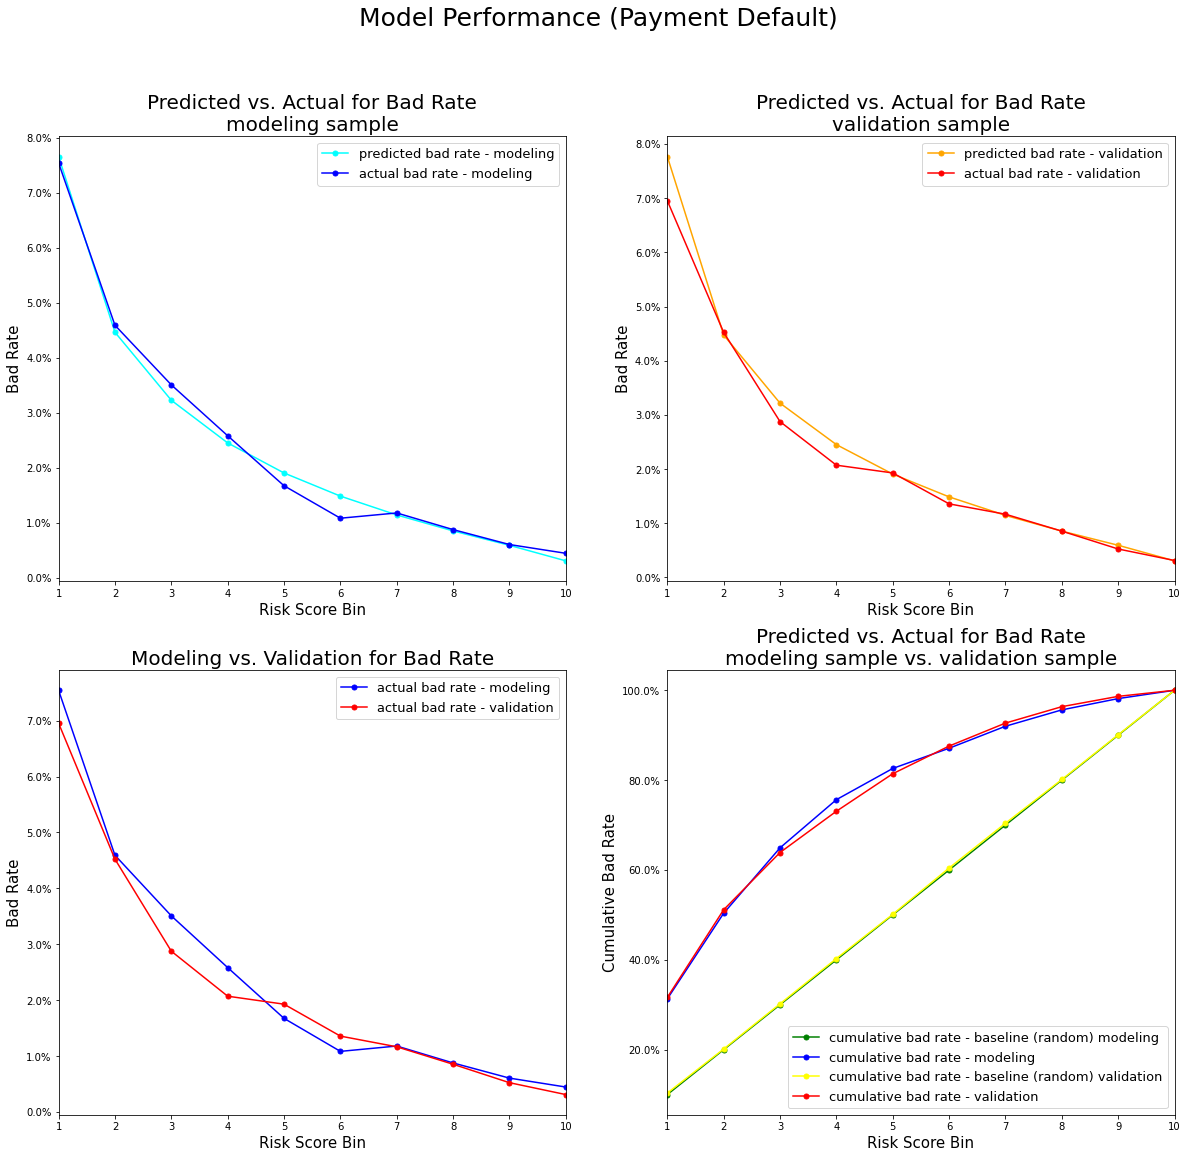

In [39]:
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import PercentFormatter

# python array ends at 10=11-1
ticks=np.arange(1, 11, step=1)

fig, axs=plt.subplots(2, 2, figsize=(20, 18))

titlesize=20
labelsize=15
legendsize=13

fig.suptitle("Model Performance (Payment Default)", fontsize=25)

axs[0,0].set_title('Predicted vs. Actual for Bad Rate\nmodeling sample', fontsize=titlesize)
axs[0,0].set_xticks(ticks)
axs[0,0].set_xlim(1, 10)
axs[0,0].plot(df_agg['risk_score_cut'], df_agg['predicted_mod'], color='cyan', marker='.', markersize=10, label='predicted bad rate - modeling')
axs[0,0].plot(df_agg['risk_score_cut'], df_agg['actual_bad_mod'], color='blue', marker='.', markersize=10, label='actual bad rate - modeling')
axs[0,0].set_xlabel('Risk Score Bin', fontsize=labelsize)
axs[0,0].set_ylabel('Bad Rate', fontsize=labelsize)
vals = axs[0,0].get_yticks()
axs[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
axs[0,0].legend(loc='upper right', fontsize=legendsize)

axs[0,1].set_title('Predicted vs. Actual for Bad Rate\nvalidation sample', fontsize=titlesize)
axs[0,1].set_xticks(ticks)
axs[0,1].set_xlim(1, 10)
axs[0,1].plot(df_agg['risk_score_cut'], df_agg['predicted_val'], color='orange', marker='.', markersize=10, label='predicted bad rate - validation')
axs[0,1].plot(df_agg['risk_score_cut'], df_agg['actual_bad_val'], color='red', marker='.', markersize=10, label='actual bad rate - validation')
axs[0,1].set_xlabel('Risk Score Bin', fontsize=labelsize)
axs[0,1].set_ylabel('Bad Rate', fontsize=labelsize)
vals = axs[0,0].get_yticks()  # need to keep the same scale as the modeling sample
axs[0,1].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
axs[0,1].legend(loc='upper right', fontsize=legendsize)

axs[1,0].set_title('Modeling vs. Validation for Bad Rate', fontsize=titlesize)
axs[1,0].set_xticks(ticks)
axs[1,0].set_xlim(1, 10)
axs[1,0].plot(df_agg['risk_score_cut'], df_agg['actual_bad_mod'], color='blue', marker='.', markersize=10, label='actual bad rate - modeling')
axs[1,0].plot(df_agg['risk_score_cut'], df_agg['actual_bad_val'], color='red', marker='.', markersize=10, label='actual bad rate - validation')
axs[1,0].set_xlabel('Risk Score Bin', fontsize=labelsize)
axs[1,0].set_ylabel('Bad Rate', fontsize=labelsize)
vals = axs[1,0].get_yticks()
axs[1,0].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
axs[1,0].legend(loc='upper right', fontsize=legendsize)

axs[1,1].set_title('Predicted vs. Actual for Bad Rate\nmodeling sample vs. validation sample', fontsize=titlesize)
axs[1,1].set_xticks(ticks)
axs[1,1].set_xlim(1, 10)
axs[1,1].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_all_mod'], color='green', marker='.', markersize=10, label='cumulative bad rate - baseline (random) modeling')
axs[1,1].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_bad_mod'], color='blue', marker='.', markersize=10, label='cumulative bad rate - modeling')
axs[1,1].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_all_val'], color='yellow', marker='.', markersize=10, label='cumulative bad rate - baseline (random) validation')
axs[1,1].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_bad_val'], color='red', marker='.', markersize=10, label='cumulative bad rate - validation')
axs[1,1].set_xlabel('Risk Score Bin', fontsize=labelsize)
axs[1,1].set_ylabel('Cumulative Bad Rate', fontsize=labelsize)
vals = axs[1,1].get_yticks()
axs[1,1].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
axs[1,1].legend(loc='lower right', fontsize=legendsize)

In [40]:
# calculate KS statistics
df_agg[['risk_score_cut', 'cumu_pct_all_mod', 'cumu_pct_bad_mod',  'cumu_pct_good_mod',
        'cumu_pct_all_val', 'cumu_pct_bad_val',  'cumu_pct_good_val']].head(10)

,risk_score_cut,cumu_pct_all_mod,cumu_pct_bad_mod,cumu_pct_good_mod,cumu_pct_all_val,cumu_pct_bad_val,cumu_pct_good_val
0,1,0.099989,0.313038,0.094729,0.103359,0.316284,0.098408
1,2,0.199994,0.503640,0.192497,0.201452,0.511482,0.194242
2,3,0.299982,0.649239,0.291360,0.302083,0.638831,0.294252
3,4,0.399987,0.756453,0.391187,0.402880,0.730689,0.395257
4,5,0.499976,0.825943,0.491929,0.501305,0.814196,0.494029
5,6,0.599981,0.870946,0.593292,0.604427,0.875783,0.598116
6,7,0.699986,0.919921,0.694556,0.704109,0.926931,0.698927
7,8,0.799974,0.956320,0.796115,0.801371,0.963466,0.797602
8,9,0.899979,0.981469,0.897968,0.900958,0.986430,0.898971
9,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


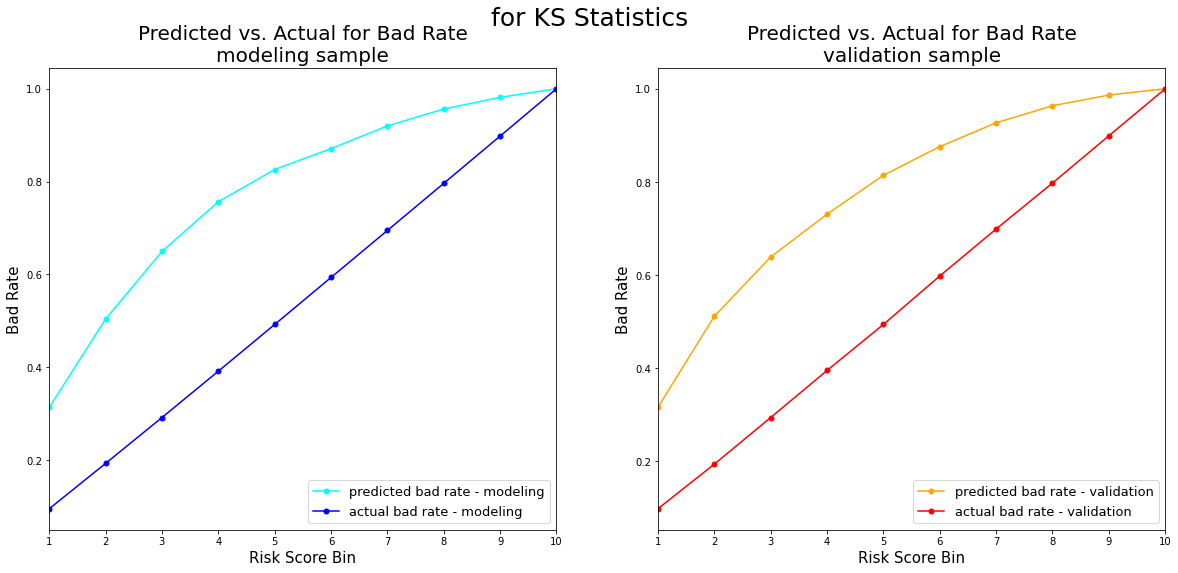

In [41]:
# calculate KS statistics

import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import PercentFormatter

# python array ends at 10=11-1
ticks=np.arange(1, 11, step=1)

fig, axs=plt.subplots(1, 2, figsize=(20, 8.5))

titlesize=20
labelsize=15
legendsize=13

fig.suptitle("for KS Statistics", fontsize=25)

axs[0].set_title('Predicted vs. Actual for Bad Rate\nmodeling sample', fontsize=titlesize)
axs[0].set_xticks(ticks)
axs[0].set_xlim(1, 10)
axs[0].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_bad_mod'], color='cyan', marker='.', markersize=10, label='predicted bad rate - modeling')
axs[0].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_good_mod'], color='blue', marker='.', markersize=10, label='actual bad rate - modeling')
axs[0].set_xlabel('Risk Score Bin', fontsize=labelsize)
axs[0].set_ylabel('Bad Rate', fontsize=labelsize)
axs[0].legend(loc='lower right', fontsize=legendsize)

axs[1].set_title('Predicted vs. Actual for Bad Rate\nvalidation sample', fontsize=titlesize)
axs[1].set_xticks(ticks)
axs[1].set_xlim(1, 10)
axs[1].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_bad_val'], color='orange', marker='.', markersize=10, label='predicted bad rate - validation')
axs[1].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_good_val'], color='red', marker='.', markersize=10, label='actual bad rate - validation')
axs[1].set_xlabel('Risk Score Bin', fontsize=labelsize)
axs[1].set_ylabel('Bad Rate', fontsize=labelsize)
axs[1].legend(loc='lower right', fontsize=legendsize)

In [42]:
print("KS statistics for the modeling sample: ", max(df_agg['cumu_pct_bad_mod']-df_agg['cumu_pct_good_mod']))
print("KS statistics for the validation sample: ", max(df_agg['cumu_pct_bad_val']-df_agg['cumu_pct_good_val']))

KS statistics for the modeling sample:  0.36526554182831117
KS statistics for the validation sample:  0.3445790285900429


## Part 6: Decline reason
* We want to give two decline reasons for not approving a loan application

In [43]:
# get the model score means 
# not needed
cscore_mean, dti_mean, oltv_mean, upb_mean=df_mod[['CSCORE_B', 'DTI', 'OLTV', 'ORIG_UPB']].mean()

In [44]:
# get the coefficient estimate from the regression
CSCORE_B_coeff=-2.8829
DTI_coeff=2.2651
OLTV_coeff=2.1547
ORIG_UPB_coeff=1.1593  

In [45]:
# calculate the contributing power  of each input variable
def contribution(x):
    
    x['cscore_contribution']=x['CSCORE_B']*CSCORE_B_coeff*-1    # because sign is negative for CSCORE_B
    x['dti_contribution']=x['DTI']*DTI_coeff
    x['oltv_contribution']=x['OLTV']*OLTV_coeff
    x['upb_contribution']=x['ORIG_UPB']*ORIG_UPB_coeff
    
contribution(df_val)

/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/1599993014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cscore_contribution']=x['CSCORE_B']*CSCORE_B_coeff*-1    # because sign is negative for CSCORE_B
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/1599993014.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['dti_contribution']=x['DTI']*DTI_coeff
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/1599993014.py:6: SettingWithCopyWarning: 
A value 

In [46]:
# rank order contributing factor from highest to lowest for all input variables
# select the top 3 contributors
x=df_val[['LOAN_ID', 'cscore_contribution', 'dti_contribution', 'oltv_contribution', 'upb_contribution']].set_index('LOAN_ID')

nlargest=3
order=np.argsort(-x.values, axis=1)[:, :nlargest]

df_top_drivers=pd.DataFrame(x.columns[order],
                            columns=['driver{}'.format(i) for i in range(1, nlargest+1)],
                            index=x.index)

print(df_top_drivers.head())

                      driver1              driver2              driver3
LOAN_ID                                                                
98836744     dti_contribution  cscore_contribution    oltv_contribution
98836951    oltv_contribution     dti_contribution  cscore_contribution
98837003    oltv_contribution     dti_contribution  cscore_contribution
98837167  cscore_contribution     dti_contribution    oltv_contribution
98837237  cscore_contribution     dti_contribution    oltv_contribution


/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/1326401892.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_top_drivers=pd.DataFrame(x.columns[order],


### Suppose we want to decline 10% of applicants with highest risk, and we are required to give 3 decline reasons.

In [47]:
df_final=pd.merge(df_val, df_top_drivers, on='LOAN_ID', how='inner')

# applicants in decile 1 are to be declined
df_final=df_final[df_final['risk_score_cut']==1].reset_index()

In [48]:
df_final.groupby('risk_score_cut')['risk_score'].mean()

risk_score_cut
1    0.077687
Name: risk_score, dtype: float64

In [49]:
# For missing data, we will fill in 'no data' for variable value. 
rawvar_list=['CSCORE_B', 'DTI', 'OLTV', 'ORIG_UPB']

for item in rawvar_list:
    df_final.loc[df_final[item].isnull(), item]='no data'

In [50]:
# assign decline reasons
def assign_reason(reason_code, driver): 
    df_final[reason_code]=np.where(df_final[driver]=='cscore_contribution', 'Credit score is too low: '+df_final['CSCORE_B_raw'].astype(int).astype(str),
                                   np.where(df_final[driver]=='dti_contribution', 'Debt-to-income ratio is too high: '+df_final['DTI_raw'].astype(int).astype(str),
                                            np.where(df_final[driver]=='oltv_contribution', 'Loan-to-value ratio is too high: '+df_final['OLTV_raw'].astype(int).astype(str), 
                                                     'Loan amount is too high: '+df_final['ORIG_UPB_raw'].astype(int).astype(str))))
    
assign_reason('reason_code1', 'driver1')
assign_reason('reason_code2', 'driver2')
assign_reason('reason_code3', 'driver3')

In [51]:
df_final[['LOAN_ID', 
          'driver1', 'reason_code1',
          'driver2', 'reason_code2',
          'driver3', 'reason_code3']]

,LOAN_ID,driver1,reason_code1,driver2,reason_code2,driver3,reason_code3
0,98836951,oltv_contribution,Loan-to-value ratio is too high: 95,dti_contribution,Debt-to-income ratio is too high: 40,cscore_contribution,Credit score is too low: 665
1,98837560,dti_contribution,Debt-to-income ratio is too high: 47,oltv_contribution,Loan-to-value ratio is too high: 90,cscore_contribution,Credit score is too low: 729
2,98837615,oltv_contribution,Loan-to-value ratio is too high: 93,dti_contribution,Debt-to-income ratio is too high: 41,cscore_contribution,Credit score is too low: 688
3,98837855,dti_contribution,Debt-to-income ratio is too high: 46,oltv_contribution,Loan-to-value ratio is too high: 80,cscore_contribution,Credit score is too low: 710
4,98838765,dti_contribution,Debt-to-income ratio is too high: 49,oltv_contribution,Loan-to-value ratio is too high: 65,cscore_contribution,Credit score is too low: 681
...,...,...,...,...,...,...,...
4352,99518977,dti_contribution,Debt-to-income ratio is too high: 48,oltv_contribution,Loan-to-value ratio is too high: 66,cscore_contribution,Credit score is too low: 679
4353,99519109,oltv_contribution,Loan-to-value ratio is too high: 92,dti_contribution,Debt-to-income ratio is too high: 40,cscore_contribution,Credit score is too low: 701
4354,99520113,dti_contribution,Debt-to-income ratio is too high: 44,oltv_contribution,Loan-to-value ratio is too high: 59,cscore_contribution,Credit score is too low: 667
4355,99520184,dti_contribution,Debt-to-income ratio is too high: 47,oltv_contribution,Loan-to-value ratio is too high: 90,cscore_contribution,Credit score is too low: 728


In [52]:
# use a few examples to illustrate
df_example=df_final[df_final['LOAN_ID']==98836951][['LOAN_ID', 'reason_code1', 'reason_code2', 'reason_code3']].reset_index()
df_example.head()

,index,LOAN_ID,reason_code1,reason_code2,reason_code3
0,0,98836951,Loan-to-value ratio is too high: 95,Debt-to-income ratio is too high: 40,Credit score is too low: 665


In [53]:
print("Dear Applicant, \nYour mortgage application (Ref #: {}) has been declined due to the following adverse reasons: \n1) {}\n2) {}\n3) {}".format(df_example['LOAN_ID'][0], 
                                                                                                                  df_example['reason_code1'][0], 
                                                                                                                  df_example['reason_code2'][0], 
                                                                                                                  df_example['reason_code3'][0]))

Dear Applicant, 
Your mortgage application (Ref #: 98836951) has been declined due to the following adverse reasons: 
1) Loan-to-value ratio is too high: 95
2) Debt-to-income ratio is too high: 40
3) Credit score is too low: 665


In [54]:
df_example=df_final[df_final['LOAN_ID']==99520184][['LOAN_ID', 'reason_code1', 'reason_code2', 'reason_code3']].reset_index()
df_example.head()

,index,LOAN_ID,reason_code1,reason_code2,reason_code3
0,4355,99520184,Debt-to-income ratio is too high: 47,Loan-to-value ratio is too high: 90,Credit score is too low: 728


In [55]:
print("Dear Applicant, \nYour mortgage application (Ref #: {}) has been declined due to the following adverse reasons: \n1) {}\n2) {}\n3) {}".format(df_example['LOAN_ID'][0], 
                                                                                                                  df_example['reason_code1'][0], 
                                                                                                                  df_example['reason_code2'][0], 
                                                                                                                  df_example['reason_code3'][0]))

Dear Applicant, 
Your mortgage application (Ref #: 99520184) has been declined due to the following adverse reasons: 
1) Debt-to-income ratio is too high: 47
2) Loan-to-value ratio is too high: 90
3) Credit score is too low: 728


## Part 7: Another logistic regression (very commonly used)
* Use both mean and standard deviation to standardize a variable.
* It helps to reduce multicollinearity. 
* This is closest to data pre-preparation for deep learning. 

#### Part 7.1 - standardize varibles

In [56]:
def standardize(x, sample):
    x_mean=df_mod[x].mean()
    x_std=df_mod[x].std()
    
    x_standardized=(sample[x]-x_mean)/x_std
    return x_standardized

# standardization criteria (min, max, std) should be based on the modeling sample
df_mod['CSCORE_B']=standardize('CSCORE_B_raw', df_mod)
df_mod['DTI']=standardize('DTI_raw', df_mod)
df_mod['OLTV']=standardize('OLTV_raw', df_mod)
df_mod['ORIG_UPB']=standardize('ORIG_UPB_raw', df_mod)

# apply the same criteria on the validation sample.spearm
# You cannot use the min and max based on the validation sample.
df_val['CSCORE_B']=standardize('CSCORE_B_raw', df_val)
df_val['DTI']=standardize('DTI_raw', df_val)
df_val['OLTV']=standardize('OLTV_raw', df_val)
df_val['ORIG_UPB']=standardize('ORIG_UPB_raw', df_val)

/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/2235094237.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['CSCORE_B']=standardize('CSCORE_B_raw', df_mod)
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/2235094237.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['DTI']=standardize('DTI_raw', df_mod)
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/2235094237.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [57]:
df_mod.drop(['LOAN_ID', 'random'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
CSCORE_B,62717.0,6.065815e-17,1.000000,-3.228100,-0.656050,0.217031,0.806951,1.845209
DTI,62717.0,3.181581e-15,1.000000,-3.354837,-0.744777,0.090443,0.821259,1.656479
OLTV,62717.0,-1.834120e-15,1.000000,-4.125947,-0.548071,0.130491,0.685679,1.425929
ORIG_UPB,62717.0,1.284312e-15,1.000000,-1.968599,-0.781001,-0.134689,0.657043,4.413731
bad,62717.0,2.409235e-02,0.153337,0.000000,0.000000,0.000000,0.000000,1.000000
CSCORE_B_raw,62717.0,7.568025e+02,42.378652,620.000000,729.000000,766.000000,791.000000,835.000000
DTI_raw,62717.0,3.413371e+01,9.578324,2.000000,27.000000,35.000000,42.000000,50.000000
OLTV_raw,62717.0,7.388464e+01,16.210735,7.000000,65.000000,76.000000,85.000000,97.000000
ORIG_UPB_raw,62717.0,2.536717e+05,123779.259828,10000.000000,157000.000000,237000.000000,335000.000000,800000.000000
risk_score,62717.0,2.409127e-02,0.022440,0.000394,0.008512,0.016820,0.032156,0.249184


In [58]:
df_val.drop(['LOAN_ID', 'random'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
CSCORE_B,42154.0,-0.002352,1.001983,-3.228100,-0.679647,0.217031,0.806951,1.774419
DTI,42154.0,0.007104,1.000130,-3.459239,-0.744777,0.090443,0.821259,1.656479
OLTV,42154.0,0.006682,1.006626,-4.064260,-0.548071,0.130491,0.685679,1.425929
ORIG_UPB,42154.0,0.001634,1.000900,-1.952441,-0.789080,-0.142768,0.665122,4.139048
bad,42154.0,0.022726,0.149031,0.000000,0.000000,0.000000,0.000000,1.000000
CSCORE_B_raw,42154.0,756.702828,42.462700,620.000000,728.000000,766.000000,791.000000,832.000000
DTI_raw,42154.0,34.201760,9.579572,1.000000,27.000000,35.000000,42.000000,50.000000
OLTV_raw,42154.0,73.992954,16.318154,8.000000,65.000000,76.000000,85.000000,97.000000
ORIG_UPB_raw,42154.0,253873.985861,123890.719446,12000.000000,156000.000000,236000.000000,336000.000000,766000.000000
risk_score,42154.0,0.024399,0.023068,0.000400,0.008583,0.016873,0.032069,0.226098


#### Part 7.2 - logistic regresion

In [59]:
import statsmodels.formula.api as smf

model=smf.logit('bad ~ CSCORE_B + DTI + OLTV + ORIG_UPB', data=df_mod).fit()

#view model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.104718
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                62717
Model:                          Logit   Df Residuals:                    62712
Method:                           MLE   Df Model:                            4
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                 0.07790
Time:                        21:17:36   Log-Likelihood:                -6567.6
converged:                       True   LL-Null:                       -7122.4
Covariance Type:            nonrobust   LLR p-value:                6.095e-239
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1021      0.036   -113.905      0.000      -4.173      -4.031
CSCORE_B      -0.5682      0.

In [60]:
def logit(x):
    x['risk_score']=-4.1021+-0.5682*x['CSCORE_B']+0.4520*x['DTI']+0.3881*x['OLTV']+0.1816*x['ORIG_UPB']
    x['risk_score']=1/(1+np.exp(-1*x['risk_score']))
    
logit(df_mod)
logit(df_val)

/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/3994720306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['risk_score']=-4.1021+-0.5682*x['CSCORE_B']+0.4520*x['DTI']+0.3881*x['OLTV']+0.1816*x['ORIG_UPB']
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/3994720306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['risk_score']=1/(1+np.exp(-1*x['risk_score']))


#### Part 7.3 - get the score cut and threshold for defining high-risk bin(s)

In [61]:
# divide the score into 10 evenly distributed bins
df_mod['risk_score_cut']=pd.qcut(df_mod['risk_score'], q=10, retbins=False, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

df_mod.groupby('risk_score_cut')[['risk_score', 'bad']].mean()

/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/2500941706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['risk_score_cut']=pd.qcut(df_mod['risk_score'], q=10, retbins=False, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


,risk_score,bad
risk_score_cut,,
0,0.003090,0.004464
1,0.005912,0.006059
2,0.008532,0.008771
3,0.011432,0.011798
4,0.014857,0.010842
5,0.019065,0.016744
6,0.024526,0.025829
7,0.032281,0.035082
8,0.044642,0.045918


In [62]:
# obtain the thresholds for dividing score into 10 bins
# The same thresholds should be applied to both modeling sample and validation sample
# Strictly speaking, you cannot create another score bins based on the validation sample and then apply to the validation sample.
score_threshold=df_mod.groupby('risk_score_cut')['risk_score'].min().reset_index()
score_threshold

,risk_score_cut,risk_score
0,0,0.000394
1,1,0.004626
2,2,0.007218
3,3,0.009916
4,4,0.013043
5,5,0.016821
6,6,0.021545
7,7,0.027864
8,8,0.037332
9,9,0.053991


In [63]:
def score_cut(x):
    
    # Initially Rthe risk score is ranked from lowest to highest.
    # For assigning score bins, we usually start with highest risk bin. 
    threshold0=score_threshold['risk_score'][9]
    threshold1=score_threshold['risk_score'][8]
    threshold2=score_threshold['risk_score'][7]
    threshold3=score_threshold['risk_score'][6]
    threshold4=score_threshold['risk_score'][5]
    threshold5=score_threshold['risk_score'][4]
    threshold6=score_threshold['risk_score'][3]
    threshold7=score_threshold['risk_score'][2]
    threshold8=score_threshold['risk_score'][1]
    
    if x > threshold0:
        return 1
    elif x > threshold1:
        return 2
    elif x > threshold2:
        return 3
    elif x > threshold3:
        return 4
    elif x > threshold4:
        return 5
    elif x > threshold5:
        return 6
    elif x > threshold6:
        return 7
    elif x > threshold7: 
        return 8
    elif x > threshold8:
        return 9
    else:
        return 10

In [64]:
# apply the same score cut to both modeling sample and validation sample
df_mod['risk_score_cut']=df_mod['risk_score'].apply(score_cut)
df_val['risk_score_cut']=df_val['risk_score'].apply(score_cut)

/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/940619607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['risk_score_cut']=df_mod['risk_score'].apply(score_cut)
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/940619607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['risk_score_cut']=df_val['risk_score'].apply(score_cut)


#### Part 7.4 - validate the risk score

In [65]:
# check the performance of modeling sample
df_mod.groupby('risk_score_cut').agg(loan_cnt_mod=('CSCORE_B', 'count'),
                                     predicted_mod=('risk_score', 'mean'),
                                     actual_mod=('bad', 'mean'),
                                     bad_cnt_mod=('bad', 'sum'))

,loan_cnt_mod,predicted_mod,actual_mod,bad_cnt_mod
risk_score_cut,,,,
1,6271,0.076572,0.075427,473
2,6272,0.044644,0.045918,288
3,6271,0.032283,0.035082,220
4,6272,0.024527,0.025829,162
5,6271,0.019065,0.016744,105
6,6272,0.014857,0.010842,68
7,6272,0.011432,0.011798,74
8,6271,0.008532,0.008771,55
9,6272,0.005912,0.006059,38


In [66]:
# check the performance of validation sample
df_val.groupby('risk_score_cut').agg(loan_cnt_va=('CSCORE_B', 'count'),
                                     predicted_val=('risk_score', 'mean'),
                                     actual_val=('bad', 'mean'),
                                     bad_cnt_val=('bad', 'sum'))

,loan_cnt_va,predicted_val,actual_val,bad_cnt_val
risk_score_cut,,,,
1,4357,0.077682,0.069543,303
2,4135,0.044740,0.045224,187
3,4242,0.032165,0.028760,122
4,4250,0.024507,0.020706,88
5,4148,0.019070,0.019286,80
6,4348,0.014861,0.013569,59
7,4202,0.011439,0.011661,49
8,4099,0.008542,0.008539,35
9,4199,0.005928,0.005239,22


In [67]:
# summarize the data for graphing later
df_mod_agg=df_mod.groupby('risk_score_cut').agg(loan_cnt_mod=('CSCORE_B', 'count'),
                                                predicted_mod=('risk_score', 'mean'),
                                                actual_bad_mod=('bad', 'mean'),
                                                actual_bad_cnt_mod=('bad', 'sum'))
df_mod_agg['actual_good_cnt_mod']=df_mod_agg['loan_cnt_mod']-df_mod_agg['actual_bad_cnt_mod']
df_mod_agg['loan_pct_mod']=df_mod_agg['loan_cnt_mod']/len(df_mod['CSCORE_B'])

df_val_agg=df_val.groupby('risk_score_cut').agg(loan_cnt_val=('CSCORE_B', 'count'),
                                                predicted_val=('risk_score', 'mean'),
                                                actual_bad_val=('bad', 'mean'),
                                                actual_bad_cnt_val=('bad', 'sum'))
df_val_agg['actual_good_cnt_val']=df_val_agg['loan_cnt_val']-df_val_agg['actual_bad_cnt_val']
df_val_agg['loan_pct_val']=df_val_agg['loan_cnt_val']/len(df_val['CSCORE_B'])

df_agg=pd.merge(df_mod_agg, df_val_agg, on='risk_score_cut', how='inner').reset_index()
df_agg.head(10)

,risk_score_cut,loan_cnt_mod,predicted_mod,actual_bad_mod,actual_bad_cnt_mod,actual_good_cnt_mod,loan_pct_mod,loan_cnt_val,predicted_val,actual_bad_val,actual_bad_cnt_val,actual_good_cnt_val,loan_pct_val
0,1,6271,0.076572,0.075427,473,5798,0.099989,4357,0.077682,0.069543,303,4054,0.103359
1,2,6272,0.044644,0.045918,288,5984,0.100005,4135,0.044740,0.045224,187,3948,0.098093
2,3,6271,0.032283,0.035082,220,6051,0.099989,4242,0.032165,0.028760,122,4120,0.100631
3,4,6272,0.024527,0.025829,162,6110,0.100005,4250,0.024507,0.020706,88,4162,0.100821
4,5,6271,0.019065,0.016744,105,6166,0.099989,4148,0.019070,0.019286,80,4068,0.098401
5,6,6272,0.014857,0.010842,68,6204,0.100005,4348,0.014861,0.013569,59,4289,0.103146
6,7,6272,0.011432,0.011798,74,6198,0.100005,4202,0.011439,0.011661,49,4153,0.099682
7,8,6271,0.008532,0.008771,55,6216,0.099989,4099,0.008542,0.008539,35,4064,0.097239
8,9,6272,0.005912,0.006059,38,6234,0.100005,4199,0.005928,0.005239,22,4177,0.099611
9,10,6273,0.003091,0.004464,28,6245,0.100021,4174,0.003050,0.003115,13,4161,0.099018


In [68]:
# modeling sample
# cumulative sum is for generating lift/gains chart and for calculating KS statistics
df_agg['cumu_cnt_bad_mod']=df_agg['actual_bad_cnt_mod'].cumsum(axis=0)
df_agg['cumu_cnt_good_mod']=df_agg['actual_good_cnt_mod'].cumsum(axis=0)
df_agg['cumu_cnt_all_mod']=df_agg['loan_cnt_mod'].cumsum(axis=0)

df_agg['cumu_pct_bad_mod']=df_agg['cumu_cnt_bad_mod']/df_agg['actual_bad_cnt_mod'].sum()
df_agg['cumu_pct_good_mod']=df_agg['cumu_cnt_good_mod']/df_agg['actual_good_cnt_mod'].sum()
df_agg['cumu_pct_all_mod']=df_agg['cumu_cnt_all_mod']/df_agg['loan_cnt_mod'].sum()


# validation sample
df_agg['cumu_cnt_bad_val']=df_agg['actual_bad_cnt_val'].cumsum(axis=0)
df_agg['cumu_cnt_good_val']=df_agg['actual_good_cnt_val'].cumsum(axis=0)
df_agg['cumu_cnt_all_val']=df_agg['loan_cnt_val'].cumsum(axis=0)

df_agg['cumu_pct_bad_val']=df_agg['cumu_cnt_bad_val']/df_agg['actual_bad_cnt_val'].sum()
df_agg['cumu_pct_good_val']=df_agg['cumu_cnt_good_val']/df_agg['actual_good_cnt_val'].sum()
df_agg['cumu_pct_all_val']=df_agg['cumu_cnt_all_val']/df_agg['loan_cnt_val'].sum()

/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/2120350066.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/2120350066.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/2120350066.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/2120350066.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_yticklabels(['{:,.1%}'.format(x) for x in vals])


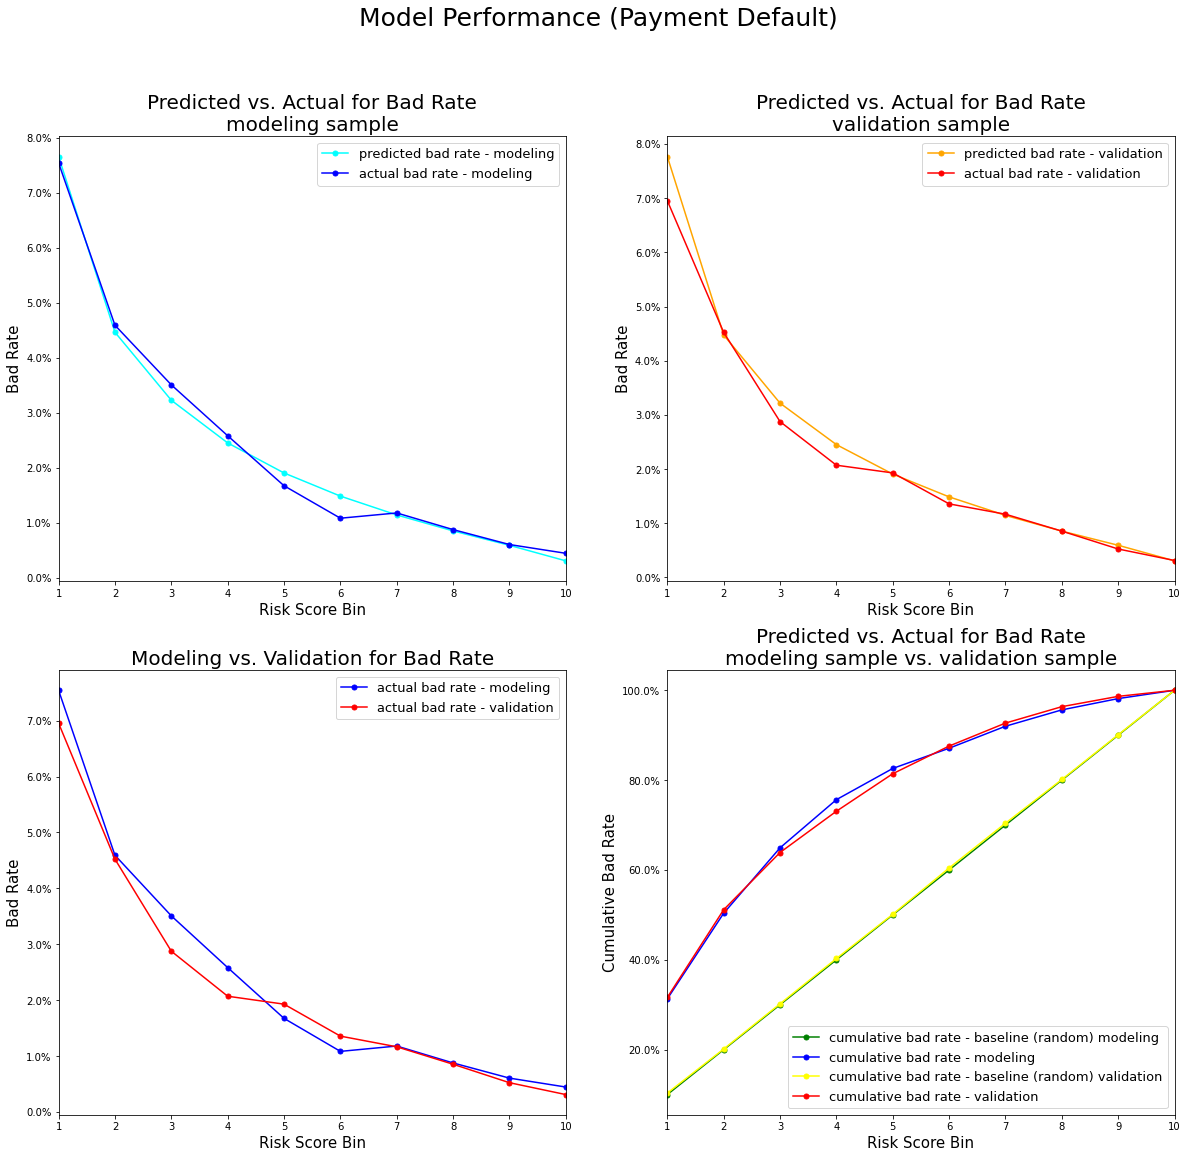

In [69]:
# python array ends at 10=11-1
ticks=np.arange(1, 11, step=1)

fig, axs=plt.subplots(2, 2, figsize=(20, 18))

titlesize=20
labelsize=15
legendsize=13

fig.suptitle("Model Performance (Payment Default)", fontsize=25)

axs[0,0].set_title('Predicted vs. Actual for Bad Rate\nmodeling sample', fontsize=titlesize)
axs[0,0].set_xticks(ticks)
axs[0,0].set_xlim(1, 10)
axs[0,0].plot(df_agg['risk_score_cut'], df_agg['predicted_mod'], color='cyan', marker='.', markersize=10, label='predicted bad rate - modeling')
axs[0,0].plot(df_agg['risk_score_cut'], df_agg['actual_bad_mod'], color='blue', marker='.', markersize=10, label='actual bad rate - modeling')
axs[0,0].set_xlabel('Risk Score Bin', fontsize=labelsize)
axs[0,0].set_ylabel('Bad Rate', fontsize=labelsize)
vals = axs[0,0].get_yticks()
axs[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
axs[0,0].legend(loc='upper right', fontsize=legendsize)

axs[0,1].set_title('Predicted vs. Actual for Bad Rate\nvalidation sample', fontsize=titlesize)
axs[0,1].set_xticks(ticks)
axs[0,1].set_xlim(1, 10)
axs[0,1].plot(df_agg['risk_score_cut'], df_agg['predicted_val'], color='orange', marker='.', markersize=10, label='predicted bad rate - validation')
axs[0,1].plot(df_agg['risk_score_cut'], df_agg['actual_bad_val'], color='red', marker='.', markersize=10, label='actual bad rate - validation')
axs[0,1].set_xlabel('Risk Score Bin', fontsize=labelsize)
axs[0,1].set_ylabel('Bad Rate', fontsize=labelsize)
vals = axs[0,0].get_yticks()  # need to keep the same scale as the modeling sample
axs[0,1].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
axs[0,1].legend(loc='upper right', fontsize=legendsize)

axs[1,0].set_title('Modeling vs. Validation for Bad Rate', fontsize=titlesize)
axs[1,0].set_xticks(ticks)
axs[1,0].set_xlim(1, 10)
axs[1,0].plot(df_agg['risk_score_cut'], df_agg['actual_bad_mod'], color='blue', marker='.', markersize=10, label='actual bad rate - modeling')
axs[1,0].plot(df_agg['risk_score_cut'], df_agg['actual_bad_val'], color='red', marker='.', markersize=10, label='actual bad rate - validation')
axs[1,0].set_xlabel('Risk Score Bin', fontsize=labelsize)
axs[1,0].set_ylabel('Bad Rate', fontsize=labelsize)
vals = axs[1,0].get_yticks()
axs[1,0].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
axs[1,0].legend(loc='upper right', fontsize=legendsize)

axs[1,1].set_title('Predicted vs. Actual for Bad Rate\nmodeling sample vs. validation sample', fontsize=titlesize)
axs[1,1].set_xticks(ticks)
axs[1,1].set_xlim(1, 10)
axs[1,1].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_all_mod'], color='green', marker='.', markersize=10, label='cumulative bad rate - baseline (random) modeling')
axs[1,1].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_bad_mod'], color='blue', marker='.', markersize=10, label='cumulative bad rate - modeling')
axs[1,1].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_all_val'], color='yellow', marker='.', markersize=10, label='cumulative bad rate - baseline (random) validation')
axs[1,1].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_bad_val'], color='red', marker='.', markersize=10, label='cumulative bad rate - validation')
axs[1,1].set_xlabel('Risk Score Bin', fontsize=labelsize)
axs[1,1].set_ylabel('Cumulative Bad Rate', fontsize=labelsize)
vals = axs[1,1].get_yticks()
axs[1,1].set_yticklabels(['{:,.1%}'.format(x) for x in vals])
axs[1,1].legend(loc='lower right', fontsize=legendsize)


In [70]:
# calculate KS statistics
df_agg[['risk_score_cut', 'cumu_pct_all_mod', 'cumu_pct_bad_mod',  'cumu_pct_good_mod',
        'cumu_pct_all_val', 'cumu_pct_bad_val',  'cumu_pct_good_val']].head(10)

,risk_score_cut,cumu_pct_all_mod,cumu_pct_bad_mod,cumu_pct_good_mod,cumu_pct_all_val,cumu_pct_bad_val,cumu_pct_good_val
0,1,0.099989,0.313038,0.094729,0.103359,0.316284,0.098408
1,2,0.199994,0.503640,0.192497,0.201452,0.511482,0.194242
2,3,0.299982,0.649239,0.291360,0.302083,0.638831,0.294252
3,4,0.399987,0.756453,0.391187,0.402904,0.730689,0.395281
4,5,0.499976,0.825943,0.491929,0.501305,0.814196,0.494029
5,6,0.599981,0.870946,0.593292,0.604450,0.875783,0.598141
6,7,0.699986,0.919921,0.694556,0.704132,0.926931,0.698951
7,8,0.799974,0.956320,0.796115,0.801371,0.963466,0.797602
8,9,0.899979,0.981469,0.897968,0.900982,0.986430,0.898995
9,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


KS statistics for the modeling sample:  0.36526554182831117
KS statistics for the validation sample:  0.3445790285900429


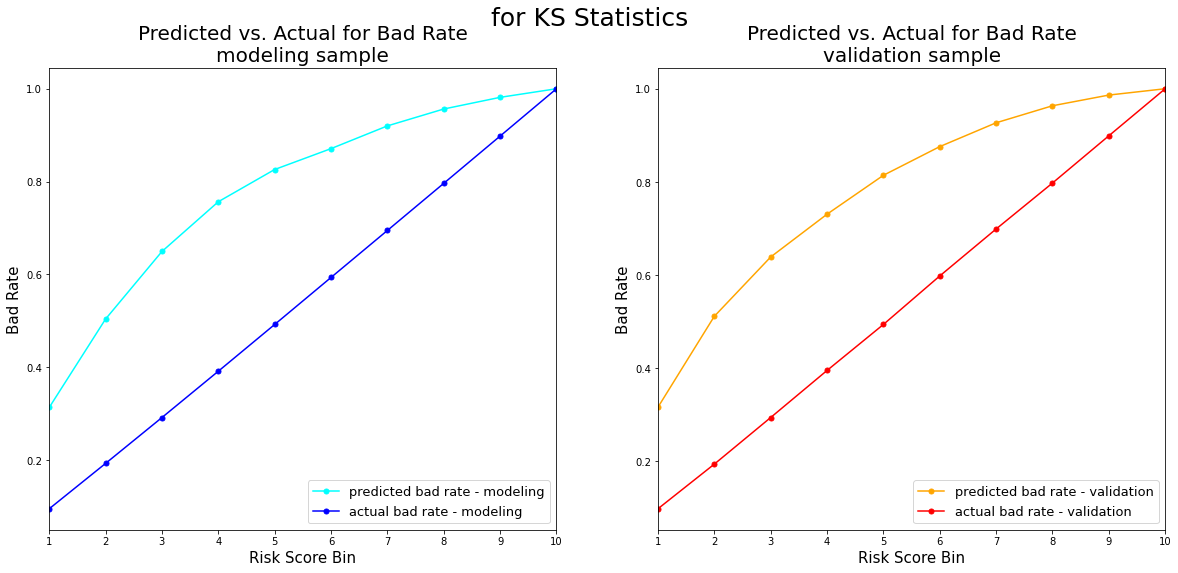

In [71]:
# calculate KS statistics

import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import PercentFormatter

# python array ends at 10=11-1
ticks=np.arange(1, 11, step=1)

fig, axs=plt.subplots(1, 2, figsize=(20, 8.5))

titlesize=20
labelsize=15
legendsize=13

fig.suptitle("for KS Statistics", fontsize=25)

axs[0].set_title('Predicted vs. Actual for Bad Rate\nmodeling sample', fontsize=titlesize)
axs[0].set_xticks(ticks)
axs[0].set_xlim(1, 10)
axs[0].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_bad_mod'], color='cyan', marker='.', markersize=10, label='predicted bad rate - modeling')
axs[0].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_good_mod'], color='blue', marker='.', markersize=10, label='actual bad rate - modeling')
axs[0].set_xlabel('Risk Score Bin', fontsize=labelsize)
axs[0].set_ylabel('Bad Rate', fontsize=labelsize)
axs[0].legend(loc='lower right', fontsize=legendsize)

axs[1].set_title('Predicted vs. Actual for Bad Rate\nvalidation sample', fontsize=titlesize)
axs[1].set_xticks(ticks)
axs[1].set_xlim(1, 10)
axs[1].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_bad_val'], color='orange', marker='.', markersize=10, label='predicted bad rate - validation')
axs[1].plot(df_agg['risk_score_cut'], df_agg['cumu_pct_good_val'], color='red', marker='.', markersize=10, label='actual bad rate - validation')
axs[1].set_xlabel('Risk Score Bin', fontsize=labelsize)
axs[1].set_ylabel('Bad Rate', fontsize=labelsize)
axs[1].legend(loc='lower right', fontsize=legendsize)

print("KS statistics for the modeling sample: ", max(df_agg['cumu_pct_bad_mod']-df_agg['cumu_pct_good_mod']))
print("KS statistics for the validation sample: ", max(df_agg['cumu_pct_bad_val']-df_agg['cumu_pct_good_val']))

#### Part 7.5 - derive contributing factors for decline

In [72]:
# get the coefficient estimate from the regression
CSCORE_B_coeff=-0.5682
DTI_coeff=0.4520
OLTV_coeff=0.3881
ORIG_UPB_coeff=0.1816

def contribution(x):
    
    x['cscore_contribution']=x['CSCORE_B']*CSCORE_B_coeff*-1    # because sign is negative for CSCORE_B
    x['dti_contribution']=x['DTI']*DTI_coeff
    x['oltv_contribution']=x['OLTV']*OLTV_coeff
    x['upb_contribution']=x['ORIG_UPB']*ORIG_UPB_coeff
    
contribution(df_val)

/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/3507387139.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cscore_contribution']=x['CSCORE_B']*CSCORE_B_coeff*-1    # because sign is negative for CSCORE_B
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/3507387139.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['dti_contribution']=x['DTI']*DTI_coeff
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/3507387139.py:11: SettingWithCopyWarning: 
A valu

In [73]:
# rank order contributing factor from highest to lowest for all input variables
# select the top 3 contributors
x=df_val[['LOAN_ID', 'cscore_contribution', 'dti_contribution', 'oltv_contribution', 'upb_contribution']].set_index('LOAN_ID')

nlargest=3
order=np.argsort(-x.values, axis=1)[:, :nlargest]

df_top_drivers=pd.DataFrame(x.columns[order],
                            columns=['driver{}'.format(i) for i in range(1, nlargest+1)],
                            index=x.index)

print(df_top_drivers.head())

                      driver1            driver2            driver3
LOAN_ID                                                            
98836744     dti_contribution  oltv_contribution   upb_contribution
98836951    oltv_contribution   dti_contribution   upb_contribution
98837003    oltv_contribution   upb_contribution   dti_contribution
98837167  cscore_contribution   dti_contribution   upb_contribution
98837237  cscore_contribution   dti_contribution  oltv_contribution


/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_85702/1326401892.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_top_drivers=pd.DataFrame(x.columns[order],


In [74]:
df_final=pd.merge(df_val, df_top_drivers, on='LOAN_ID', how='inner')

# applicants in decile 1 are to be declined
df_final=df_final[df_final['risk_score_cut']==1].reset_index()

In [75]:
# For missing data, we will fill in 'no data' for variable value. 
rawvar_list=['CSCORE_B', 'DTI', 'OLTV', 'ORIG_UPB']

for item in rawvar_list:
    df_final.loc[df_final[item].isnull(), item]='no data'

In [76]:
# assign decline reasons
def assign_reason(reason_code, driver): 
    df_final[reason_code]=np.where(df_final[driver]=='cscore_contribution', 'Credit score is too low: '+df_final['CSCORE_B_raw'].astype(int).astype(str),
                                   np.where(df_final[driver]=='dti_contribution', 'Debt-to-income ratio is too high: '+df_final['DTI_raw'].astype(int).astype(str),
                                            np.where(df_final[driver]=='oltv_contribution', 'Loan-to-value ratio is too high: '+df_final['OLTV_raw'].astype(int).astype(str), 
                                                     'Loan amount is too high: '+df_final['ORIG_UPB_raw'].astype(int).astype(str))))
    
assign_reason('reason_code1', 'driver1')
assign_reason('reason_code2', 'driver2')
assign_reason('reason_code3', 'driver3')

In [77]:
df_final[['LOAN_ID', 
          'driver1', 'reason_code1',
          'driver2', 'reason_code2',
          'driver3', 'reason_code3']]

,LOAN_ID,driver1,reason_code1,driver2,reason_code2,driver3,reason_code3
0,98836951,oltv_contribution,Loan-to-value ratio is too high: 95,dti_contribution,Debt-to-income ratio is too high: 40,upb_contribution,Loan amount is too high: 109000
1,98837560,dti_contribution,Debt-to-income ratio is too high: 47,oltv_contribution,Loan-to-value ratio is too high: 90,upb_contribution,Loan amount is too high: 335000
2,98837615,oltv_contribution,Loan-to-value ratio is too high: 93,upb_contribution,Loan amount is too high: 484000,dti_contribution,Debt-to-income ratio is too high: 41
3,98837855,dti_contribution,Debt-to-income ratio is too high: 46,oltv_contribution,Loan-to-value ratio is too high: 80,upb_contribution,Loan amount is too high: 215000
4,98838765,dti_contribution,Debt-to-income ratio is too high: 49,upb_contribution,Loan amount is too high: 165000,oltv_contribution,Loan-to-value ratio is too high: 65
...,...,...,...,...,...,...,...
4352,99518977,dti_contribution,Debt-to-income ratio is too high: 48,upb_contribution,Loan amount is too high: 410000,oltv_contribution,Loan-to-value ratio is too high: 66
4353,99519109,upb_contribution,Loan amount is too high: 572000,oltv_contribution,Loan-to-value ratio is too high: 92,dti_contribution,Debt-to-income ratio is too high: 40
4354,99520113,dti_contribution,Debt-to-income ratio is too high: 44,upb_contribution,Loan amount is too high: 250000,oltv_contribution,Loan-to-value ratio is too high: 59
4355,99520184,dti_contribution,Debt-to-income ratio is too high: 47,oltv_contribution,Loan-to-value ratio is too high: 90,upb_contribution,Loan amount is too high: 428000


In [78]:
df_example=df_final[df_final['LOAN_ID']==98836951][['LOAN_ID', 'reason_code1', 'reason_code2', 'reason_code3']].reset_index()
df_example.head()

,index,LOAN_ID,reason_code1,reason_code2,reason_code3
0,0,98836951,Loan-to-value ratio is too high: 95,Debt-to-income ratio is too high: 40,Loan amount is too high: 109000


In [79]:
print("Dear Applicant, \nYour mortgage application (Ref #: {}) has been declined due to the following adverse reasons: \n1) {}\n2) {}\n3) {}".format(df_example['LOAN_ID'][0], 
                                                                                                                  df_example['reason_code1'][0], 
                                                                                                                  df_example['reason_code2'][0], 
                                                                                                                  df_example['reason_code3'][0]))

Dear Applicant, 
Your mortgage application (Ref #: 98836951) has been declined due to the following adverse reasons: 
1) Loan-to-value ratio is too high: 95
2) Debt-to-income ratio is too high: 40
3) Loan amount is too high: 109000
